## Car Price Prediction using Linear, Ridge and Lasso Regression

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


In [477]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data understanding

    Let's first have a look at the dataset and understand the size, attribute names etc.


In [478]:
#Reasing data set 
df_housing = pd.read_csv('train.csv')
df_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [479]:
# summary of the dataset:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [480]:
#shape of dataset 
df_housing.shape

(1460, 81)

In [481]:
#let introspect of Distribution of target coulmn

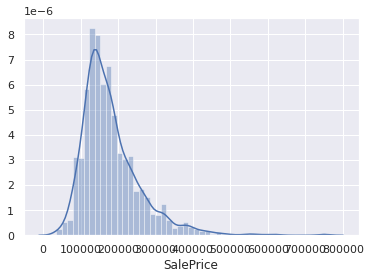

In [482]:
sns.distplot(df_housing['SalePrice'])

Clearly visible SalePrice is right skewed 

In [483]:
#check skewnwss of target variable
df_housing['SalePrice'].skew()

1.8828757597682129

range : -0.5 to 0.5 hences lightly skwewd to right

In [484]:
df_housing['SalePrice'].kurt()

6.536281860064529

#kurt range :-3 to +3...it is higher than normal

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


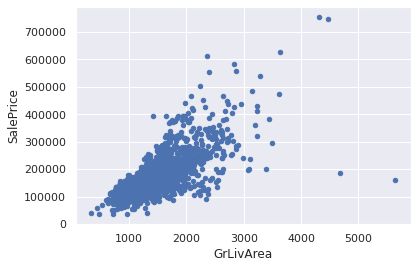

In [485]:
#GrLivArea

var = 'GrLivArea'
data = pd.concat([df_housing['SalePrice'],df_housing[var]], axis =1)
data.plot.scatter(x= var, y ='SalePrice')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


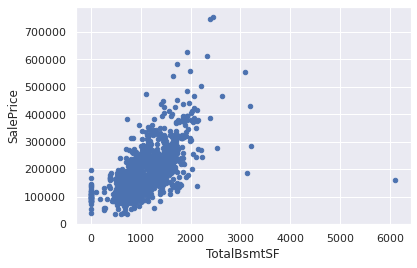

In [486]:

var = 'TotalBsmtSF'
data = pd.concat([df_housing['SalePrice'],df_housing[var]], axis =1)
data.plot.scatter(x= var, y ='SalePrice')

**Outlier analysis:**

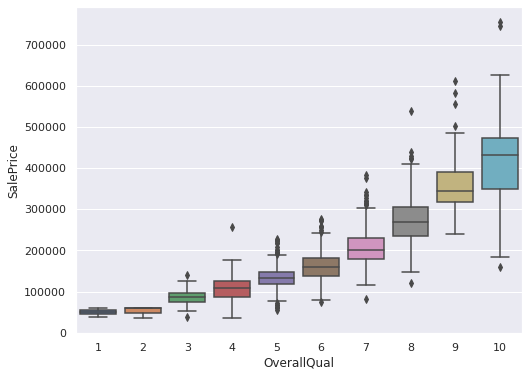

In [487]:
var ='OverallQual'
data = pd.concat([df_housing['SalePrice'],df_housing[var]], axis =1)
f,ax =plt.subplots(figsize= (8,6))
fig = sns.boxplot(x = var, y= 'SalePrice',data = data)

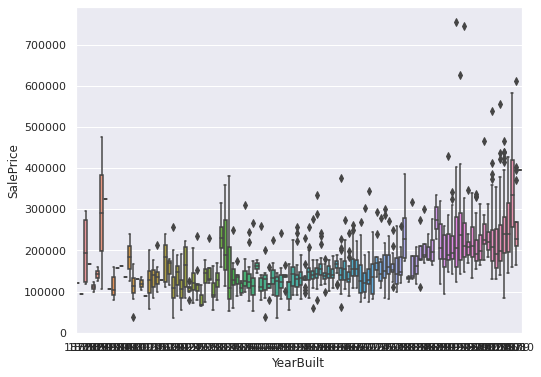

In [488]:
#Outlier analysis
var ='YearBuilt'
data = pd.concat([df_housing['SalePrice'],df_housing[var]], axis =1)
f,ax =plt.subplots(figsize= (8,6))
fig = sns.boxplot(x = var, y= 'SalePrice',data = data)

**not readable and it is very dificult to understand**

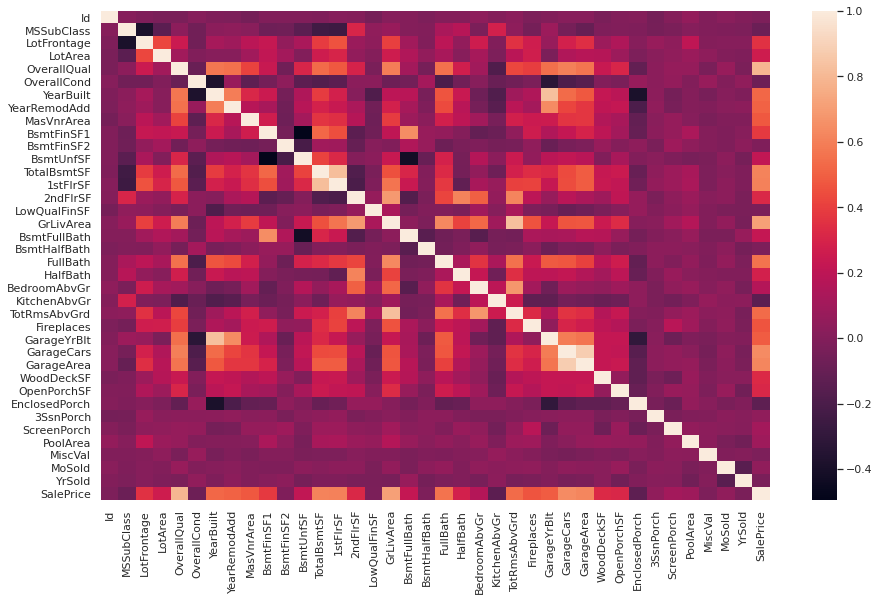

In [489]:
#Correlation matrix
cormat = df_housing.corr()
f,ax = plt.subplots(figsize=(15,9))
sns.heatmap(cormat)

#### There is correltaion can be seen between
1.GarageYrBlt and OverallCond

2.Enclosed porch and Yearbuilt

3.GarageYrBlt and GarageCars

**scatterplot :** SalePrice,OverallQual,GrLivArea, GarageCars,TotalBsmtSF, FullBath, YearBuilt


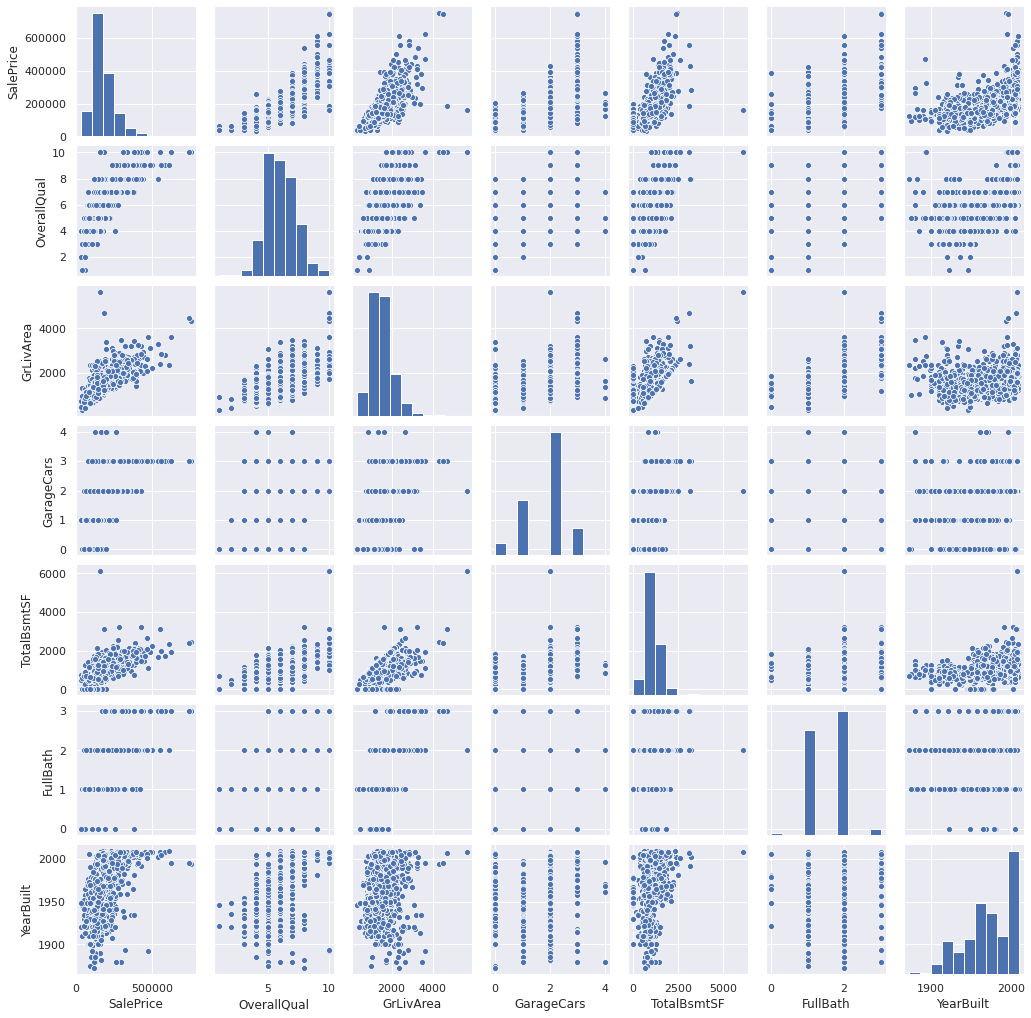

In [490]:
sns.set()
cols =['SalePrice','OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_housing[cols], size=2)
plt.show();

# Data Cleaning

In [491]:
total =df_housing.isna().sum().sort_values(ascending = False)
perecetage = (df_housing.isna().sum()/df_housing.isna().count()).sort_values(ascending = False)
missingData = pd.concat([total,perecetage],axis=1, keys=['Total','Percentage'])
missingData.head(30)


,Total,Percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


#here NA dosent mean that the data is not availble , it has some other meaning
#Lets replace them with meaningful values

In [492]:
null_shown_cols= ['PoolQC','MiscFeature','Alley','Fence' ,'FireplaceQu','LotFrontage'
                  ,'GarageCond','GarageType','GarageYrBlt','GarageFinish','GarageQual'
                  ,'BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual' ]


In [493]:
for i in null_shown_cols:
    df_housing[i].fillna('NoInfo',inplace =True)

df_housing.isna().sum().sort_values(ascending = False)

MasVnrType       8
MasVnrArea       8
Electrical       1
SalePrice        0
Foundation       0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
BsmtQual         0
YearRemodAdd     0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
RoofStyle        0
YearBuilt        0
Heating          0
OverallCond      0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
TotalBsmtSF      0
HeatingQC        0
SaleCondition    0
ScreenPorch      0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
PoolArea         0
GarageCars  

In [494]:
#Drop othe na values from data set
df_housing=df_housing.dropna(axis=0, how='any')

In [495]:
total =df_housing.isna().sum().sort_values(ascending = False)
perecetage = (df_housing.isna().sum()/df_housing.isna().count()).sort_values(ascending = False)
missingData = pd.concat([total,perecetage],axis=1, keys=['Total','Percentage'])
missingData.head(30)


,Total,Percentage
SalePrice,0,0.0
Heating,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0


Now the data set clean, there is no NA values present

In [496]:
#Find the data types of all the columns 
df_dtypes = df_housing.dtypes
df_dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage       object
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [497]:
# lets create datfram of all numerical columns
df_num = df_dtypes[(df_dtypes =='int64')|(df_dtypes=='float')]
df_num

Id                 int64
MSSubClass         int64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [498]:
# lets create datfram of all categorial columns
df_cat = df_dtypes[(df_dtypes =='object')]
df_cat

MSZoning         object
LotFrontage      object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageYrBlt      object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence           

In [499]:
#convert num_train to a list 
numerical_train_data =  list(df_num.index)
numerical_train_data

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [500]:
#convert cat_train to a list 
cat_train_data =  list(df_cat.index)
cat_train_data

['MSZoning',
 'LotFrontage',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

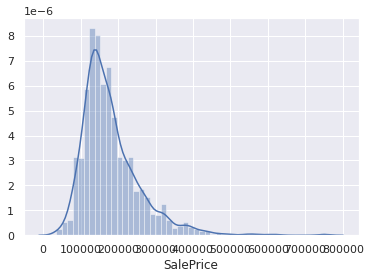

In [501]:
sns.distplot(df_housing['SalePrice'])

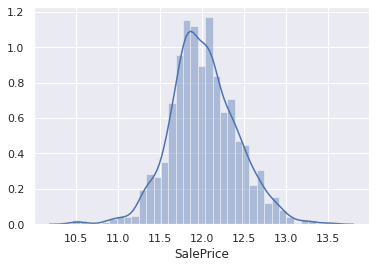

In [502]:
sns.distplot(np.log(df_housing['SalePrice']))

**it is more normally distributed**
## Transform this data into log

In [503]:
df_housing['TransformedPrice'] = np.log(df_housing['SalePrice'])

In [504]:
cat_train_data

['MSZoning',
 'LotFrontage',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [505]:
df_housing['Alley'].value_counts()

NoInfo    1361
Grvl        50
Pave        40
Name: Alley, dtype: int64

In [506]:
df_housing['Alley'].unique()

array(['NoInfo', 'Grvl', 'Pave'], dtype=object)

In [507]:
#Catagorial value encoded
for i in cat_train_data:
    feature_set = set(df_housing[i])
    for j in feature_set:
        feature_list = list(feature_set)
        df_housing.loc[df_housing[i]== j,i]= feature_list.index(j)
        

In [508]:
df_housing['Alley'].unique()

array([0, 2, 1], dtype=object)

In [509]:
df_housing['Alley'].value_counts()

0    1361
2      50
1      40
Name: Alley, dtype: int64

In [510]:
df_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TransformedPrice
0,1,60,0,36,8450,0,0,3,1,0,...,0,0,0,0,2,2008,8,0,208500,12.247694
1,2,20,0,51,9600,0,0,3,1,0,...,0,0,0,0,5,2007,8,0,181500,12.109011
2,3,60,0,39,11250,0,0,2,1,0,...,0,0,0,0,9,2008,8,0,223500,12.317167
3,4,70,0,31,9550,0,0,2,1,0,...,0,0,0,0,2,2006,8,1,140000,11.849398
4,5,60,0,55,14260,0,0,2,1,0,...,0,0,0,0,12,2008,8,0,250000,12.429216


# Model Building

In [511]:
#import useful libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [512]:
X = df_housing.iloc[ : , :-1 ] # all rows, all cols except (-1)th col
y = df_housing['TransformedPrice'].values

In [513]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [514]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3, random_state = 100)


## Linear Regression

Let's now try predicting car prices, a dataset using linear regression.

In [515]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [516]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

12.02012007400745
[-2.86582657e-03 -2.86503038e-03 -2.27509112e-02  1.20306066e-03
  3.94470119e-03 -1.24873011e-03  5.98275578e-03  7.00661200e-04
  1.84571859e-03 -9.45314688e-04 -4.61344717e-03  1.63221164e-03
  2.40781598e-03  4.73664937e-03  3.86663814e-03  1.15560917e-02
  6.74419684e-03  3.36243246e-02  3.14251215e-02  2.99784663e-02
  1.24302625e-02  2.51200684e-03 -4.47961328e-03  1.70943421e-02
 -7.60450146e-03  1.62687819e-02 -2.13935348e-02 -1.17775076e-02
 -3.80335922e-03 -3.12807028e-03  2.55741642e-03  4.02418171e-04
  1.71121670e-03 -5.86154461e-03  4.82014534e+10  1.20671169e-02
  1.71243485e+10  4.68084407e+10 -4.63538533e+10 -6.31838013e-04
  1.08772466e-02 -2.05475750e-02 -3.21151294e-03 -7.50127939e+10
 -8.50373102e+10 -9.50251152e+09  1.02445277e+11  1.26722367e-02
  2.57243659e-03  9.88906789e-03  7.16268891e-03  2.15814833e-02
  4.96109867e-03 -9.03456141e-04 -1.11009521e-02 -4.32073820e-03
 -2.83192036e-03  1.88238022e-02 -9.58105659e-03  2.45462969e-03
  1.012

In [517]:
from sklearn.metrics import r2_score, mean_squared_error

In [518]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9596575753443948
0.9471868235228051
6.560979977400507
3.629320375754417
0.006464019682167987
0.008324129302189029


## Ridge and Lasso Regression

Let's now try predicting Sale prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

In [519]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
params ={
    'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20.0,50.0,100.0,500.0,1000.0]
}
print(params)

{'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 50.0, 100.0, 500.0, 1000.0]}


In [553]:
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 100.0, 500.0, 1000.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [554]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [569]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = 0.0001
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.00287421 -0.0028382  -0.02279707  0.00120207  0.00394802 -0.00123669
  0.00596897  0.00068435  0.00181329 -0.00094269 -0.00463284  0.00161947
  0.00239682  0.00474193  0.00388211  0.01152554  0.00671614  0.03366004
  0.03142437  0.02989984  0.01246238  0.00250706 -0.00448541  0.01713396
 -0.00763582  0.01628427 -0.02140328 -0.01180272 -0.00381315 -0.00312035
  0.00255658  0.00040758  0.00171041 -0.00586216 -0.00111337  0.01207326
  0.00778457  0.00164455  0.00337875 -0.00063214  0.01086948 -0.02055146
 -0.00323006  0.00998479  0.00862305  0.00635212  0.01505808  0.01264932
  0.00253957  0.00988244  0.00716899  0.02154766  0.00499518 -0.00089348
 -0.01110782 -0.00430219 -0.00284029  0.01883552 -0.00957541  0.00246432
  0.01011943  0.01140295  0.00699672  0.00791165  0.00785801 -0.00379034
  0.00272699  0.00167394  0.011684    0.00151325  0.00692607  0.01995634
 -0.0343425  -0.00653727 -0.00214919 -0.00213181 -0.00368463 -0.00520462
 -0.00140774 -0.00953073  0.27086649]


In [570]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9596562884519327
0.9471918055856804
6.5611892676389765
3.6289780084985095
0.006464225879447267
0.008323344056189242


### Lasso

In [571]:
lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv= folds,
                       return_train_score=True,
                       verbose= 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 100.0, 500.0, 1000.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [572]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [581]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [582]:
lasso.coef_

array([-1.94766793e-03,  0.00000000e+00, -2.17754530e-02,  0.00000000e+00,
        3.51642527e-03, -1.44178024e-03,  4.13418468e-03, -0.00000000e+00,
        8.28566646e-04, -3.43061265e-04, -3.87026236e-03,  1.50918624e-03,
        0.00000000e+00,  3.55008374e-03,  2.60603702e-03,  1.04590226e-02,
        2.15993197e-03,  3.33578667e-02,  3.00841801e-02,  2.75219814e-02,
        1.20288583e-02,  2.56423893e-03, -4.71453897e-03,  1.00380192e-02,
       -0.00000000e+00,  1.25336624e-02, -1.72043040e-02, -8.59046496e-03,
       -3.08327048e-03, -0.00000000e+00,  3.39715813e-03,  1.10041991e-05,
        3.42535815e-04, -3.30314678e-03,  0.00000000e+00,  9.57701927e-03,
        6.19671155e-03,  0.00000000e+00,  3.77453579e-03, -0.00000000e+00,
        9.38574502e-03, -2.05405708e-02, -2.97033617e-03,  9.73741494e-04,
        0.00000000e+00,  2.54749690e-03,  2.09737373e-02,  1.06154296e-02,
        6.22444674e-04,  9.74412372e-03,  6.18609115e-03,  1.87376380e-02,
        0.00000000e+00, -

In [583]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9587862599925535
0.9487607891162241
6.702683968329021
3.521157493307868
0.006603629525447311
0.00807604929657768


In [580]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.959658,0.959656,0.957704
1,R2 Score (Test),0.947187,0.947192,0.949004
2,RSS (Train),6.560980,6.561189,6.878674
3,RSS (Test),3.629320,3.628978,3.504436
4,MSE (Train),0.080399,0.080400,0.082323
5,MSE (Test),0.091237,0.091232,0.089653


## Lets observe the changes in the coefficients after regularization

In [543]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.047340,0.012025,0.004701,0.001346,0.0001,{'alpha': 0.0001},-0.066140,-0.055008,-0.058103,-0.055770,...,-0.059197,0.004045,2,-0.051549,-0.053184,-0.053924,-0.054127,-0.051091,-0.052775,0.001237
1,0.013542,0.000586,0.004882,0.000073,0.001,{'alpha': 0.001},-0.063739,-0.053473,-0.056479,-0.054955,...,-0.057862,0.003795,1,-0.051328,-0.053015,-0.053654,-0.053856,-0.050738,-0.052518,0.001258
2,0.008403,0.001207,0.004298,0.001301,0.01,{'alpha': 0.01},-0.062693,-0.060016,-0.058412,-0.059816,...,-0.061403,0.002716,3,-0.057997,-0.060345,-0.060561,-0.060229,-0.056779,-0.059182,0.001519
3,0.006715,0.000586,0.003582,0.000479,0.05,{'alpha': 0.05},-0.091355,-0.086611,-0.086098,-0.085909,...,-0.088533,0.002890,4,-0.086343,-0.088537,-0.088450,-0.088406,-0.085049,-0.087357,0.001417
4,0.005958,0.000294,0.003741,0.000653,0.1,{'alpha': 0.1},-0.122692,-0.118552,-0.117988,-0.109305,...,-0.118232,0.004879,5,-0.116034,-0.120288,-0.119748,-0.116917,-0.115962,-0.117790,0.001858
5,0.008703,0.001511,0.003522,0.000508,0.2,{'alpha': 0.2},-0.195638,-0.185731,-0.188531,-0.165046,...,-0.184236,0.010227,6,-0.184812,-0.185476,-0.183040,-0.182722,-0.184157,-0.184041,0.001040
6,0.006533,0.001606,0.005062,0.001064,0.3,{'alpha': 0.3},-0.276549,-0.254967,-0.260215,-0.226130,...,-0.255014,0.016309,7,-0.257108,-0.255445,-0.251358,-0.251780,-0.257123,-0.254563,0.002523
7,0.006167,0.000504,0.003751,0.000586,0.4,{'alpha': 0.4},-0.331103,-0.311116,-0.319966,-0.285585,...,-0.311788,0.015016,8,-0.306556,-0.311918,-0.308973,-0.318331,-0.312101,-0.311576,0.003950
8,0.005416,0.000347,0.003266,0.000133,0.5,{'alpha': 0.5},-0.331103,-0.311116,-0.319966,-0.285585,...,-0.311788,0.015016,8,-0.306556,-0.311918,-0.308973,-0.318331,-0.312101,-0.311576,0.003950
9,0.005174,0.000294,0.003192,0.000227,0.6,{'alpha': 0.6},-0.331103,-0.311116,-0.319966,-0.285585,...,-0.311788,0.015016,8,-0.306556,-0.311918,-0.308973,-0.318331,-0.312101,-0.311576,0.003950


In [544]:
betas = pd.DataFrame(index=X.columns)

In [545]:
betas.rows = X.columns

In [546]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [549]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
Id,-2.865827e-03,-0.002874,-0.001948
MSSubClass,-2.865030e-03,-0.002838,0.000000
MSZoning,-2.275091e-02,-0.022797,-0.021775
LotFrontage,1.203061e-03,0.001202,0.000000
LotArea,3.944701e-03,0.003948,0.003516
Street,-1.248730e-03,-0.001237,-0.001442
Alley,5.982756e-03,0.005969,0.004134
LotShape,7.006612e-04,0.000684,-0.000000
LandContour,1.845719e-03,0.001813,0.000829
Utilities,-9.453147e-04,-0.000943,-0.000343


### Top predictor variables

1.BsmtExposure

2.BsmtFinType2

3.TotalBsmtSF

4.GrLivArea

5.OverallCond
